In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import code_preprocessing.preprocessing as ppc
import pathlib
import os
from collections import Counter

In [2]:
with open("../raw_text.pkl", "rb") as file:
    rawdata = pickle.load(file)

#print(rawdata)

### Looking at Data

In [3]:
rawdata.keys() # Names of the stories

dict_keys(['sweetaspie', 'thatthingonmyarm', 'tildeath', 'indianapolis', 'lawsthatchokecreativity', 'golfclubbing', 'jugglingandjesus', 'shoppinginchina', 'cocoonoflove', 'hangtime', 'beneaththemushroomcloud', 'dialogue4', 'thepostmanalwayscalls', 'stumblinginthedark', 'kiksuya', 'haveyoumethimyet', 'theinterview', 'againstthewind', 'tetris', 'canplanetearthfeedtenbillionpeoplepart2', 'alternateithicatom', 'goldiethegoldfish', 'seedpotatoesofleningrad', 'onapproachtopluto', 'canplanetearthfeedtenbillionpeoplepart1', 'bluehope', 'superheroesjustforeachother', 'howtodraw', 'myfirstdaywiththeyankees', 'thumbsup', 'avatar', 'mayorofthefreaks', 'gangstersandcookies', 'breakingupintheageofgoogle', 'forgettingfear', 'waitingtogo', 'firetestforlove', 'goingthelibertyway', 'thefreedomridersandme', 'exorcism', 'itsabox', 'inamoment', 'afearstrippedbare', 'swimmingwithastronauts', 'ifthishaircouldtalk', 'whenmothersbullyback', 'vixenandtheussr', 'adollshouse', 'catfishingstrangerstofindmyself', '

In [4]:
rawdata["sweetaspie"].__dict__.keys() # Information for each story

dict_keys(['data', 'split_inds', 'data_times', 'tr_times'])

In [5]:
print(rawdata["sweetaspie"].__dict__["data"]) # This is the raw text

['', 'i', 'embarked', 'on', 'a', 'journey', 'toward', 'the', 'sea', 'of', 'matrimony', 'at', 'the', 'perilous', 'age', 'of', 'forty', 'one', 'yeah', "you'd", 'think', 'forty', 'one', 'a', 'trip', 'to', 'marriage', 'would', 'be', 'pretty', 'smooth', 'but', 'nobody', 'had', 'told', 'my', 'family', 'my', 'sister', 'called', 'me', 'up', 'and', 'she', 'said', 'you', 'have', 'to', 'order', 'engraved', 'invitations', 'i', 'said', 'i', "don't", 'think', 'so', "we're", 'having', 'a', 'potluck', 'she', 'called', 'again', 'people', 'are', 'asking', 'me', 'what', 'to', 'get', 'you', 'for', 'a', 'wedding', 'present', 'you', 'have', 'to', 'register', 'at', 'stores', 'i', 'said', 'i', "don't", 'think', 'so', "we're", 'combining', 'two', 'apartments', "we've", 'got', 'so', 'many', 'duplicates', "we're", 'trying', 'to', 'figure', 'out', 'what', 'to', 'give', 'away', 'but', 'they', 'want', 'to', 'give', 'you', 'presents', 'she', 'said', 'we', 'know', "that's", 'why', "we're", 'having', 'a', 'potluck', '

In [6]:
print(rawdata["sweetaspie"].__dict__["split_inds"]) # I do not know a lot

[0, 0, 0, 0, 0, 3, 7, 11, 16, 18, 22, 25, 31, 35, 37, 44, 50, 51, 61, 61, 64, 69, 78, 82, 86, 92, 99, 109, 115, 118, 126, 128, 131, 136, 144, 149, 156, 163, 171, 177, 180, 189, 195, 195, 198, 202, 204, 209, 216, 225, 231, 237, 243, 245, 250, 253, 253, 256, 258, 262, 265, 271, 274, 277, 284, 294, 295, 300, 307, 313, 319, 322, 322, 326, 333, 333, 333, 339, 342, 343, 346, 346, 351, 351, 354, 356, 356, 365, 374, 375, 375, 379, 381, 382, 386, 386, 386, 390, 395, 398, 404, 407, 410, 412, 418, 426, 432, 438, 442, 444, 445, 445, 446, 452, 454, 460, 463, 467, 474, 482, 490, 499, 502, 510, 514, 517, 523, 529, 532, 536, 536, 537, 541, 548, 550, 552, 558, 560, 562, 563, 567, 574, 579, 582, 587, 587, 590, 594, 597, 602, 609, 610, 616, 623, 630, 639, 642, 642, 645, 648, 654, 660, 660, 663, 666, 670, 673, 680, 684, 689, 692]


In [7]:
#print(rawdata["sweetaspie"].__dict__["data_times"]) # I do not know a lot

In [8]:
print(rawdata["sweetaspie"].__dict__["tr_times"]) # I do not know a lot

[ -9.  -7.  -5.  -3.  -1.   1.   3.   5.   7.   9.  11.  13.  15.  17.
  19.  21.  23.  25.  27.  29.  31.  33.  35.  37.  39.  41.  43.  45.
  47.  49.  51.  53.  55.  57.  59.  61.  63.  65.  67.  69.  71.  73.
  75.  77.  79.  81.  83.  85.  87.  89.  91.  93.  95.  97.  99. 101.
 103. 105. 107. 109. 111. 113. 115. 117. 119. 121. 123. 125. 127. 129.
 131. 133. 135. 137. 139. 141. 143. 145. 147. 149. 151. 153. 155. 157.
 159. 161. 163. 165. 167. 169. 171. 173. 175. 177. 179. 181. 183. 185.
 187. 189. 191. 193. 195. 197. 199. 201. 203. 205. 207. 209. 211. 213.
 215. 217. 219. 221. 223. 225. 227. 229. 231. 233. 235. 237. 239. 241.
 243. 245. 247. 249. 251. 253. 255. 257. 259. 261. 263. 265. 267. 269.
 271. 273. 275. 277. 279. 281. 283. 285. 287. 289. 291. 293. 295. 297.
 299. 301. 303. 305. 307. 309. 311. 313. 315. 317. 319. 321. 323. 325.
 327. 329. 331. 333.]


In [9]:
print(len(rawdata["sweetaspie"].__dict__["data"]))
print(len(rawdata["sweetaspie"].__dict__["split_inds"]))
print(len(rawdata["sweetaspie"].__dict__["data_times"]))
print(len(rawdata["sweetaspie"].__dict__["tr_times"]))

697
171
697
172


In [10]:
loaded_data = np.load("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject2/sweetaspie.npy")
print(len(loaded_data))    # Number of fMRI measurements
print(len(loaded_data[0])) # Number of Voxels

157
94251


In [11]:
loaded_data = np.load("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject3/sweetaspie.npy")
print(len(loaded_data))    # Number of fMRI measurements (Of course, it is the same as "subject2/sweetaspie")
print(len(loaded_data[0])) # Number of Voxels

157
95556


In [12]:
loaded_data = np.load("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject2/adollshouse.npy")
print(len(loaded_data))     # Number of fMRI measurements
print(len(loaded_data[0]))  # Number of Voxels (Of course, it is the same as "subject2/sweetaspie")

241
94251


In [13]:
folder_subject2 = pathlib.Path("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject2")
print(len(list(folder_subject2.glob("*.npy"))))

folder_subject3 = pathlib.Path("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject3")
print(len(list(folder_subject3.glob("*.npy"))))

101
101


In [14]:
# We know that the story sets of subject2 and subject3 are the same, meaning that we can use
# the same word embedding for both subject2 and subject3.

def get_filenames(folder_path):
    return set(f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)))

folder_subject2 = "../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject2"
folder_subject3 = "../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject3"

files_subject2 = get_filenames(folder_subject2)
files_subject3 = get_filenames(folder_subject3)

print(files_subject2 == files_subject3)

True


In [15]:
print(files_subject2)

{'gpsformylostidentity.npy', 'thetiniestbouquet.npy', 'forgettingfear.npy', 'waitingtogo.npy', 'canplanetearthfeedtenbillionpeoplepart2.npy', 'comingofageondeathrow.npy', 'lifereimagined.npy', 'gangstersandcookies.npy', 'exorcism.npy', 'mayorofthefreaks.npy', 'cautioneating.npy', 'treasureisland.npy', 'penpal.npy', 'againstthewind.npy', 'itsabox.npy', 'haveyoumethimyet.npy', 'souls.npy', 'myfathershands.npy', 'onapproachtopluto.npy', 'adollshouse.npy', 'beneaththemushroomcloud.npy', 'christmas1940.npy', 'thumbsup.npy', 'hangtime.npy', 'buck.npy', 'indianapolis.npy', 'birthofanation.npy', 'theadvancedbeginner.npy', 'goldiethegoldfish.npy', 'odetostepfather.npy', 'lifeanddeathontheoregontrail.npy', 'fromboyhoodtofatherhood.npy', 'mybackseatviewofagreatromance.npy', 'notontheusualtour.npy', 'wildwomenanddancingqueens.npy', 'singlewomanseekingmanwich.npy', 'alternateithicatom.npy', 'igrewupinthewestborobaptistchurch.npy', 'tetris.npy', 'sweetaspie.npy', 'thesurprisingthingilearnedsailingso

In [16]:
print(files_subject3)

{'gpsformylostidentity.npy', 'thetiniestbouquet.npy', 'forgettingfear.npy', 'waitingtogo.npy', 'canplanetearthfeedtenbillionpeoplepart2.npy', 'comingofageondeathrow.npy', 'lifereimagined.npy', 'gangstersandcookies.npy', 'exorcism.npy', 'mayorofthefreaks.npy', 'cautioneating.npy', 'treasureisland.npy', 'penpal.npy', 'againstthewind.npy', 'itsabox.npy', 'haveyoumethimyet.npy', 'souls.npy', 'myfathershands.npy', 'onapproachtopluto.npy', 'adollshouse.npy', 'beneaththemushroomcloud.npy', 'christmas1940.npy', 'thumbsup.npy', 'hangtime.npy', 'buck.npy', 'indianapolis.npy', 'birthofanation.npy', 'theadvancedbeginner.npy', 'goldiethegoldfish.npy', 'odetostepfather.npy', 'lifeanddeathontheoregontrail.npy', 'fromboyhoodtofatherhood.npy', 'mybackseatviewofagreatromance.npy', 'notontheusualtour.npy', 'wildwomenanddancingqueens.npy', 'singlewomanseekingmanwich.npy', 'alternateithicatom.npy', 'igrewupinthewestborobaptistchurch.npy', 'tetris.npy', 'sweetaspie.npy', 'thesurprisingthingilearnedsailingso

In [17]:
# There are 8 stories which does not exist in "subject" data.
# "dialogue1 ~ dialogue6", "myfirstdaywiththeyankees", "onlyonewaytofindout"

print(len(rawdata))
print(sorted(rawdata.keys()))

109
['adollshouse', 'adventuresinsayingyes', 'afatherscover', 'afearstrippedbare', 'againstthewind', 'alternateithicatom', 'avatar', 'backsideofthestorm', 'becomingindian', 'beneaththemushroomcloud', 'birthofanation', 'bluehope', 'breakingupintheageofgoogle', 'buck', 'canadageeseandddp', 'canplanetearthfeedtenbillionpeoplepart1', 'canplanetearthfeedtenbillionpeoplepart2', 'canplanetearthfeedtenbillionpeoplepart3', 'catfishingstrangerstofindmyself', 'cautioneating', 'christmas1940', 'cocoonoflove', 'comingofageondeathrow', 'dialogue1', 'dialogue2', 'dialogue3', 'dialogue4', 'dialogue5', 'dialogue6', 'escapingfromadirediagnosis', 'exorcism', 'eyespy', 'findingmyownrescuer', 'firetestforlove', 'food', 'forgettingfear', 'fromboyhoodtofatherhood', 'gangstersandcookies', 'goingthelibertyway', 'goldiethegoldfish', 'golfclubbing', 'googlingstrangersandkentuckybluegrass', 'gpsformylostidentity', 'hangtime', 'haveyoumethimyet', 'howtodraw', 'ifthishaircouldtalk', 'igrewupinthewestborobaptistchur

In [18]:
# So, we can eliminate these 8 stories from the rawdata

del rawdata['dialogue1']
del rawdata['dialogue2']
del rawdata['dialogue3']
del rawdata['dialogue4']
del rawdata['dialogue5']
del rawdata['dialogue6']
del rawdata['myfirstdaywiththeyankees']
del rawdata['onlyonewaytofindout']

In [19]:
len(rawdata)

101

### Part1.1

In [20]:
full_stories = list(rawdata.keys())

# Random split between train data and test data
train_stories, test_stories = train_test_split(full_stories, test_size = 0.3, random_state = 1)

print(len(train_stories))
print(len(test_stories))

70
31


In [21]:
# Make the word list used in the training data

def list_allwords(data, stories):
    word_list = [item for story in stories for item in data[story].__dict__["data"]]
    word_list_unique = list(set(word_list))
    return word_list_unique

In [22]:
#bow_list = list_allwords(rawdata, train_stories)
#print(len(bow_list))
#print(bow_list)

In [23]:
def list_topwords(data, stories, p):
    words = [item for story in stories for item in data[story].__dict__["data"]]
    counter = Counter(words)
    top = counter.most_common(p)
    top_words = [word for word, _ in top]
    return top_words

In [24]:
bow_list = list_topwords(rawdata, train_stories, 300)
print(bow_list)

['and', 'the', 'i', 'to', 'a', 'of', 'was', 'that', 'in', 'my', 'you', 'it', 'we', 'like', 'this', 'so', 'he', 'me', 'is', 'but', 'for', 'know', 'on', 'had', 'with', "i'm", 'at', 'they', 'just', 'uh', 'all', 'have', 'there', 'were', 'up', 'what', 'be', 'she', 'out', 'as', 'um', 'not', 'one', 'about', "it's", 'then', 'when', 'said', 'from', 'would', 'do', 'his', 'are', 'our', 'get', 'him', 'because', 'time', 'really', 'can', 'her', 'back', 'go', 'an', "don't", 'or', 'if', 'gonna', 'no', 'by', 'got', 'now', 'two', 'people', 'could', 'us', 'into', 'them', 'very', 'how', 'see', "didn't", 'who', 'these', 'over', 'where', 'been', 'say', 'their', 'little', 'day', 'years', 'going', 'more', 'down', 'your', 'around', 'first', 'some', "he's", 'way', 'which', 'went', 'other', 'think', 'even', 'did', 'right', 'well', 'never', "we're", 'thing', 'thought', 'new', 'life', 'has', 'come', 'something', 'off', "that's", 'only', 'than', 'kind', 'after', "you're", 'good', 'every', 'look', 'make', 'through',

In [25]:
# Create the matrix of one-hot vectors.
# If the word is not in the word list (there is a possibility that the test data 
# does not have the word in the word list), skip it.

def make_embed(data, stories, word_list):
    bow_dict = {}
    for story in stories:
        text = data[story].__dict__["data"]
        bow = np.zeros((len(text), len(word_list)))
        for i in range(len(bow)):
            if text[i] in word_list:
                index = word_list.index(text[i])
                bow[i, index] = 1
        bow_dict[story] = bow
    
    return bow_dict

In [26]:
dict_embed_train = make_embed(rawdata, train_stories, bow_list)
dict_embed_test = make_embed(rawdata, test_stories, bow_list)

In [27]:
dict_embed_train["sweetaspie"]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
# Dimension: (Word count of the story) * (Number of the unique words)
dict_embed_train["sweetaspie"].shape

(697, 300)

### Part1.2

In [29]:
# Downsample the matrix in terms of the row dimension
# Original size: (Word count of the story) * (Number of the unique words)
# Goal size: (The number of the fMRI measurements) * (Number of the unique words)

def dict_downsample(data, dict_embed):
    keys = list(dict_embed.keys())
    dict_ds = ppc.downsample_word_vectors(keys, dict_embed, data)
    for key in keys:
        dict_ds[key] = dict_ds[key][5:-10, :]
    return dict_ds

In [30]:
dict_embed_train = dict_downsample(rawdata, dict_embed_train)
dict_embed_test = dict_downsample(rawdata, dict_embed_test)

In [31]:
dict_embed_train["sweetaspie"].shape

(157, 300)

In [32]:
# You can see that the row dimension matches the fMRI data

loaded_data = np.load("../tmp_ondemand_ocean_mth240012p_symlink/shared/data/subject2/sweetaspie.npy")
print(len(loaded_data))    # Number of fMRI measurements

157


### Part 1.3

In [33]:
# Add delayed factors [1, 2, 3, 4] for each data

def dict_makedelayed(dict_embed, delays):
    keys = list(dict_embed.keys())
    for key in keys:
        dict_embed[key] = ppc.make_delayed(dict_embed[key], delays)
    return dict_embed

In [34]:
dict_embed_train = dict_makedelayed(dict_embed_train, [0, 1, 2, 3, 4])
dict_embed_test = dict_makedelayed(dict_embed_test, [0, 1, 2, 3, 4])

In [35]:
# You can find that the column dimension get 5 times larger (by being added 1-4 delayed factors)

print(dict_embed_train["sweetaspie"].shape)

(157, 1500)


### Part 1.4

In [36]:
#please do pip install gensim before running this
from gensim.models import KeyedVectors
import urllib.request
import zipfile
import gensim.downloader as api

In [37]:
#Loading pre-trained Word2Vec embeddings from Google News corpus.
def get_word2vec_embeddings():
    word2vec_model = api.load('word2vec-google-news-300')
    return word2vec_model

#Creating Word2Vec embeddings for all words in each story.
def make_word2vec_embed(data, stories, model):
    embed_dict = {}
    embedding_dim = 300 #300 dimensions for Word2Vec embeddings
    for story in stories:
        text = data[story].__dict__["data"] #raw text
        story_embed = np.zeros((len(text), embedding_dim)) #initializing embedding matrix
        for i, word in enumerate(text):
            try:
                story_embed[i] = model[word]
            #skipping words not in the vocabulary (leaving as zeros)
            except KeyError:
                continue
        embed_dict[story] = story_embed
    return embed_dict

In [38]:
#Download and load pre-trained GloVe embeddings (i've mentioned url below as well)
def get_glove_embeddings():
    glove_path = 'glove.6B'
    if not os.path.exists(glove_path):
        os.makedirs(glove_path, exist_ok=True)
    glove_file = os.path.join(glove_path, 'glove.6B.300d.txt')
    #This will locally download GloVe embeddings for you
    if not os.path.exists(glove_file):
        print("Downloading GloVe embeddings (this may take some time)...")
        # lets download embeddings for glove
        url = 'https://nlp.stanford.edu/data/glove.6B.zip'
        zip_path = 'glove.6B.zip'
        urllib.request.urlretrieve(url, zip_path)
        # By Unziping the file that is in zip
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(glove_path)
        os.remove(zip_path)
    
    glove_model = {}
    #just loading the glove embeddings
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            glove_model[word] = vector
    
    print(f"Loaded {len(glove_model)} GloVe word vectors")
    return glove_model

In [39]:
#creating GloVe embeddings for all words in each story
def make_glove_embed(data, stories, glove_model):
    embed_dict = {}
    embedding_dim = 300  #300 dimensions for GloVe embeddings
    #same steps as i did above
    for story in stories:
        text = data[story].__dict__["data"]
        story_embed = np.zeros((len(text), embedding_dim))
        for i, word in enumerate(text):
            if word in glove_model:
                # by getting word embeddins for glove
                story_embed[i] = glove_model[word]
        embed_dict[story] = story_embed
    return embed_dict

In [40]:
#This is the main function to process the embeddings for all stories
#Here we basically do train/test splitting, embedding generation, downsampling, and adding delayed features.
def process_embeddings(rawdata):
    #Splitting stories into train and test sets (same split as in part 1)
    full_stories = list(rawdata.keys())
    train_stories, test_stories = train_test_split(full_stories, test_size=0.3, random_state=1)
    #Process Word2Vec embeddings
    print("Processing Word2Vec embeddings...")
    word2vec_model = get_word2vec_embeddings()
    word2vec_train = make_word2vec_embed(rawdata, train_stories, word2vec_model)
    word2vec_test = make_word2vec_embed(rawdata, test_stories, word2vec_model)
    
    #Downsample Word2Vec embeddings to match fMRI measurements
    word2vec_train = dict_downsample(rawdata, word2vec_train)
    word2vec_test = dict_downsample(rawdata, word2vec_test)
    
    #adding lagged features to Word2Vec embeddings
    word2vec_train = dict_makedelayed(word2vec_train, [1, 2, 3, 4])
    word2vec_test = dict_makedelayed(word2vec_test, [1, 2, 3, 4])
    print(f"Word2Vec train shape for 'sweetaspie': {word2vec_train['sweetaspie'].shape}")
    
    #Same stuff as above but for GloVe
    print("Processing GloVe embeddings...")
    glove_model = get_glove_embeddings()
    glove_train = make_glove_embed(rawdata, train_stories, glove_model)
    glove_test = make_glove_embed(rawdata, test_stories, glove_model)
    
    
    glove_train = dict_downsample(rawdata, glove_train)
    glove_test = dict_downsample(rawdata, glove_test)
    
    
    glove_train = dict_makedelayed(glove_train, [1, 2, 3, 4])
    glove_test = dict_makedelayed(glove_test, [1, 2, 3, 4])
    
    print(f"GloVe train shape for 'sweetaspie': {glove_train['sweetaspie'].shape}")
    
    #Returning all processed embeddings
    return {
        'word2vec': (word2vec_train, word2vec_test),
        'glove': (glove_train, glove_test)
    }

In [41]:
# functions from part 2 and 3
def dict_downsample(data, dict_embed):
   keys = list(dict_embed.keys())
   dict_ds = ppc.downsample_word_vectors(keys, dict_embed, data)
   for key in keys:
       dict_ds[key] = dict_ds[key][5:-10, :]
   return dict_ds

def dict_makedelayed(dict_embed, delays):
   keys = list(dict_embed.keys())
   for key in keys:
       dict_embed[key] = ppc.make_delayed(dict_embed[key], delays)
   return dict_embed

In [42]:
embedding_results = process_embeddings(rawdata)

Processing Word2Vec embeddings...
Word2Vec train shape for 'sweetaspie': (157, 1200)
Processing GloVe embeddings...
Loaded 63669 GloVe word vectors
GloVe train shape for 'sweetaspie': (157, 1200)


In [43]:
word2vec_train, word2vec_test = embedding_results['word2vec']

In [44]:
#word2vec_train

In [45]:
#word2vec_test

In [46]:
glove_train, glove_test = embedding_results['glove']

In [47]:
#glove_train

In [48]:
#glove_test

In [49]:
import os
import numpy as np
import pandas as pd

def load_measurement_data_by_subject(story_key):
    """Load measurement data and return it separated by subject."""
    base_dir = "../tmp_ondemand_ocean_mth240012p_symlink/shared/data"
    subject2_file = os.path.join(base_dir, "subject2", f"{story_key}.npy")
    subject3_file = os.path.join(base_dir, "subject3", f"{story_key}.npy")
    
    subject2_data = None
    subject3_data = None
    
    if os.path.exists(subject2_file):
        subject2_data = np.load(subject2_file)
        print(f"Loaded subject2 data for '{story_key}'")
    
    if os.path.exists(subject3_file):
        subject3_data = np.load(subject3_file)
        print(f"Loaded subject3 data for '{story_key}'")
    
    return subject2_data, subject3_data

# Load first 6 keys for train and first 2 keys for test
train_keys = list(dict_embed_train.keys())
test_keys = list(dict_embed_test.keys())

# Initialize lists to store data for each subject
subject2_train_rows = []
subject3_train_rows = []
subject2_test_rows = []
subject3_test_rows = []

# Process training data
print("\nProcessing training data:")
for story_key in train_keys:
    subject2_data, subject3_data = load_measurement_data_by_subject(story_key)
    
    if subject2_data is not None:
        subject2_train_rows.append({
            'story_key': story_key,
            'measurement_data': subject2_data
        })
    
    if subject3_data is not None:
        subject3_train_rows.append({
            'story_key': story_key,
            'measurement_data': subject3_data
        })

# Process test data
print("\nProcessing test data:")
for story_key in test_keys:
    subject2_data, subject3_data = load_measurement_data_by_subject(story_key)
    
    if subject2_data is not None:
        subject2_test_rows.append({
            'story_key': story_key,
            'measurement_data': subject2_data
        })
    
    if subject3_data is not None:
        subject3_test_rows.append({
            'story_key': story_key,
            'measurement_data': subject3_data
        })

# Create DataFrames for each subject
train_resp_subject2 = pd.DataFrame(subject2_train_rows).set_index('story_key')
train_resp_subject3 = pd.DataFrame(subject3_train_rows).set_index('story_key')
test_resp_subject2 = pd.DataFrame(subject2_test_rows).set_index('story_key')
test_resp_subject3 = pd.DataFrame(subject3_test_rows).set_index('story_key')

# Print summary
print("\nDataset Summary:")
print(f"Subject 2 training stories: {len(train_resp_subject2)}")
print(f"Subject 3 training stories: {len(train_resp_subject3)}")
print(f"Subject 2 test stories: {len(test_resp_subject2)}")
print(f"Subject 3 test stories: {len(test_resp_subject3)}")

print("\nTraining stories for Subject 2:", list(train_resp_subject2.index))
print("Training stories for Subject 3:", list(train_resp_subject3.index))
print("\nTest stories for Subject 2:", list(test_resp_subject2.index))
print("Test stories for Subject 3:", list(test_resp_subject3.index))

# Print shapes of measurement data
print("\nMeasurement data shapes:")
if len(train_resp_subject2) > 0:
    print(f"Subject 2 training shape: {train_resp_subject2.iloc[0]['measurement_data'].shape}")
if len(train_resp_subject3) > 0:
    print(f"Subject 3 training shape: {train_resp_subject3.iloc[0]['measurement_data'].shape}")


Processing training data:
Loaded subject2 data for 'googlingstrangersandkentuckybluegrass'
Loaded subject3 data for 'googlingstrangersandkentuckybluegrass'
Loaded subject2 data for 'alternateithicatom'
Loaded subject3 data for 'alternateithicatom'
Loaded subject2 data for 'thumbsup'
Loaded subject3 data for 'thumbsup'
Loaded subject2 data for 'igrewupinthewestborobaptistchurch'
Loaded subject3 data for 'igrewupinthewestborobaptistchurch'
Loaded subject2 data for 'penpal'
Loaded subject3 data for 'penpal'
Loaded subject2 data for 'wildwomenanddancingqueens'
Loaded subject3 data for 'wildwomenanddancingqueens'
Loaded subject2 data for 'canplanetearthfeedtenbillionpeoplepart3'
Loaded subject3 data for 'canplanetearthfeedtenbillionpeoplepart3'
Loaded subject2 data for 'souls'
Loaded subject3 data for 'souls'
Loaded subject2 data for 'threemonths'
Loaded subject3 data for 'threemonths'
Loaded subject2 data for 'christmas1940'
Loaded subject3 data for 'christmas1940'
Loaded subject2 data fo


==================== Analyzing subject2 ====================

Evaluating word2vec embedding for subject2

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1200 features → 94251 voxels
Testing:  10283 timepoints × 1200 features → 94251 voxels

Running cross-validation...
CV mean CC: 0.0101 (±0.0006)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0053 ± 0.0096
Story 2: mean CC = 0.0090 ± 0.0118
Story 3: mean CC = 0.0089 ± 0.0114
Story 4: mean CC = 0.0068 ± 0.0107
Story 5: mean CC = 0.0061 ± 0.0088
Story 6: mean CC = 0.0085 ± 0.0124
Story 7: mean CC = 0.0056 ± 0.0096
Story 8: mean CC = 0.0123 ± 0.0135
Story 9: mean CC = 0.0070 ± 0.0110
Story 10: mean CC = 0.0118 ± 0.0128
Story 11: mean CC = 0.0109 ± 0.0129
Story 12: mean CC = 0.0108 ± 0.0140
Story 13: mean CC = 0.0055 ± 0.0092
Story 14: mean CC = 0.0100 ± 0.0124
Story 15: mean CC = 0.0128 ± 0.0135
Story 16: mean CC = 0.0118 ± 0.0159
Story 17: mean CC = 0.0074 ± 0.0115
Story 18: 

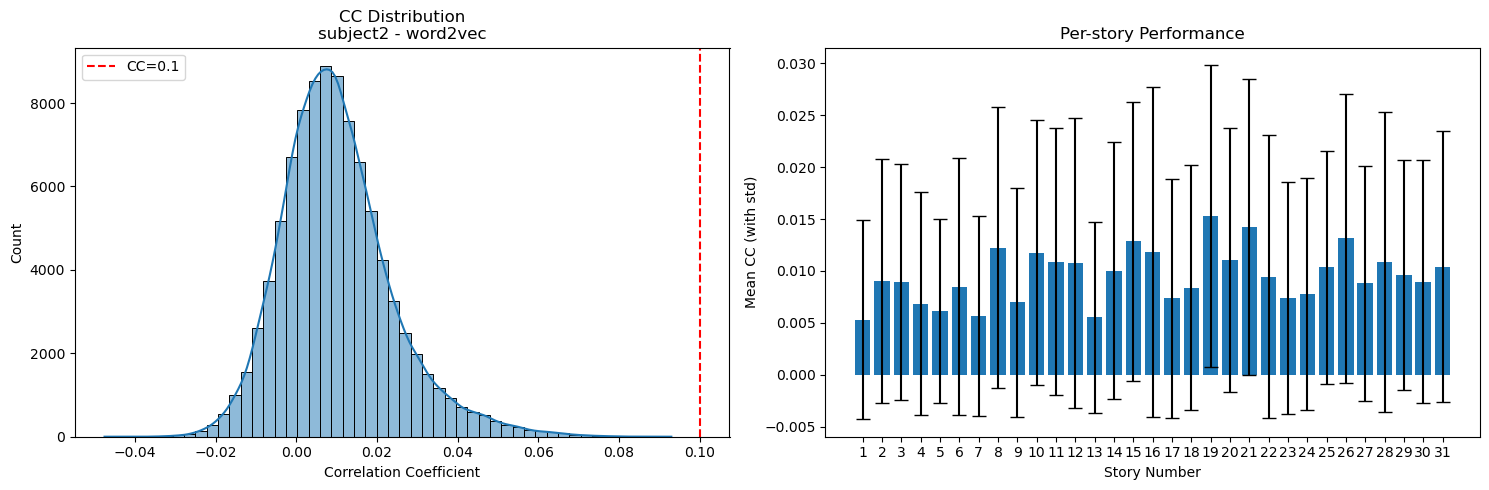


Results Summary:
Mean CC: 0.0101
Median CC: 0.0086
Top 1% CC: 0.0525
Top 5% CC: 0.0356
Voxels with CC > 0.1: 0.0%

Evaluating glove embedding for subject2

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1200 features → 94251 voxels
Testing:  10283 timepoints × 1200 features → 94251 voxels

Running cross-validation...
CV mean CC: 0.0090 (±0.0000)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0054 ± 0.0097
Story 2: mean CC = 0.0082 ± 0.0114
Story 3: mean CC = 0.0088 ± 0.0114
Story 4: mean CC = 0.0063 ± 0.0103
Story 5: mean CC = 0.0061 ± 0.0088
Story 6: mean CC = 0.0056 ± 0.0117
Story 7: mean CC = 0.0056 ± 0.0094
Story 8: mean CC = 0.0095 ± 0.0118
Story 9: mean CC = 0.0072 ± 0.0103
Story 10: mean CC = 0.0101 ± 0.0106
Story 11: mean CC = 0.0090 ± 0.0110
Story 12: mean CC = 0.0097 ± 0.0122
Story 13: mean CC = 0.0062 ± 0.0095
Story 14: mean CC = 0.0079 ± 0.0122
Story 15: mean CC = 0.0103 ± 0.0119
Story 16: mean CC = 0.0109 ± 0.0

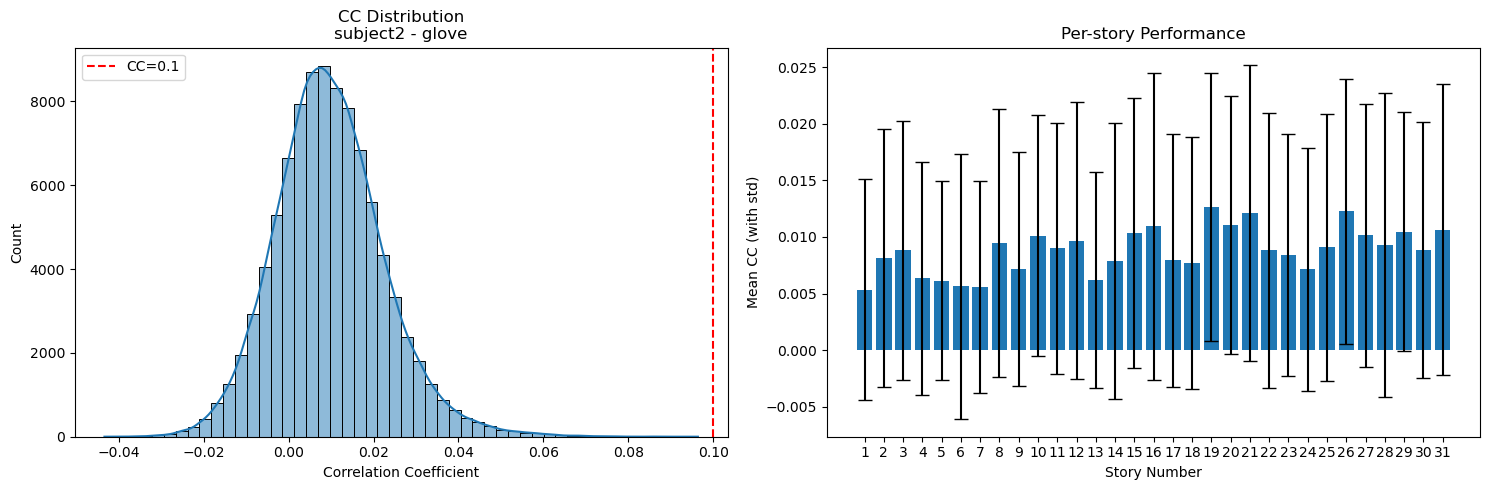


Results Summary:
Mean CC: 0.0097
Median CC: 0.0091
Top 1% CC: 0.0457
Top 5% CC: 0.0317
Voxels with CC > 0.1: 0.0%

Evaluating bag_of_words embedding for subject2

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1500 features → 94251 voxels
Testing:  10283 timepoints × 1500 features → 94251 voxels

Running cross-validation...
CV mean CC: 0.0065 (±0.0006)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0027 ± 0.0106
Story 2: mean CC = 0.0045 ± 0.0110
Story 3: mean CC = 0.0050 ± 0.0119
Story 4: mean CC = 0.0047 ± 0.0113
Story 5: mean CC = 0.0021 ± 0.0110
Story 6: mean CC = 0.0087 ± 0.0123
Story 7: mean CC = 0.0033 ± 0.0109
Story 8: mean CC = 0.0090 ± 0.0152
Story 9: mean CC = 0.0035 ± 0.0124
Story 10: mean CC = 0.0093 ± 0.0156
Story 11: mean CC = 0.0101 ± 0.0138
Story 12: mean CC = 0.0104 ± 0.0188
Story 13: mean CC = 0.0033 ± 0.0107
Story 14: mean CC = 0.0094 ± 0.0147
Story 15: mean CC = 0.0102 ± 0.0136
Story 16: mean CC = 0.010

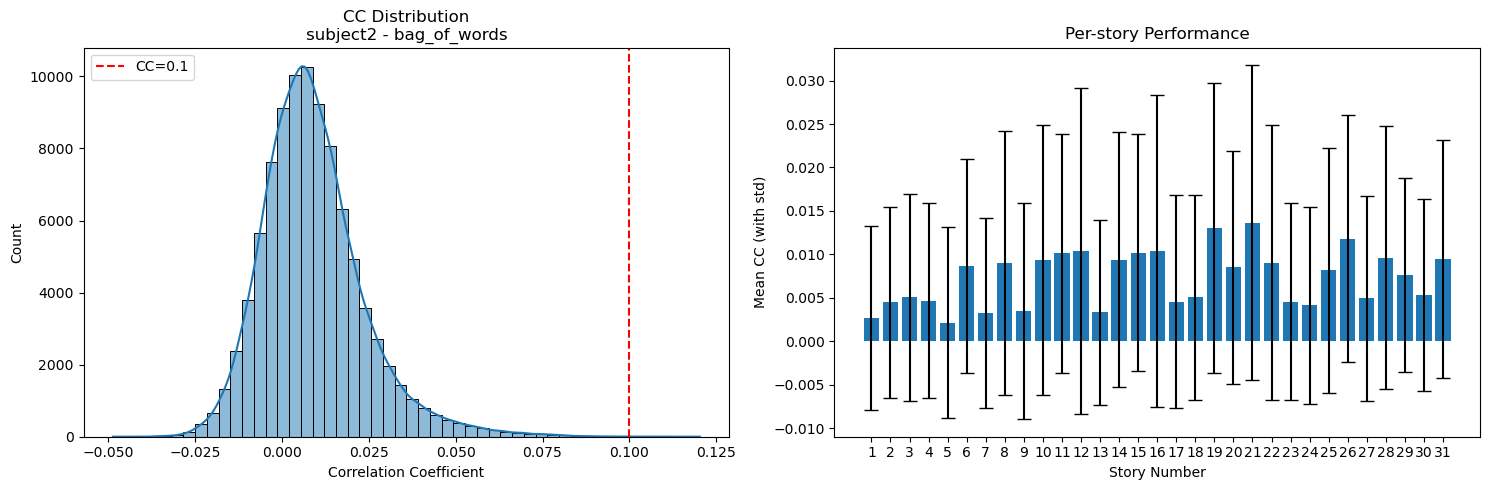


Results Summary:
Mean CC: 0.0091
Median CC: 0.0074
Top 1% CC: 0.0565
Top 5% CC: 0.0355
Voxels with CC > 0.1: 0.0%

==================== Analyzing subject3 ====================

Evaluating word2vec embedding for subject3

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1200 features → 95556 voxels
Testing:  10283 timepoints × 1200 features → 95556 voxels

Running cross-validation...
CV mean CC: 0.0179 (±0.0004)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0070 ± 0.0106
Story 2: mean CC = 0.0078 ± 0.0119
Story 3: mean CC = 0.0120 ± 0.0164
Story 4: mean CC = 0.0097 ± 0.0117
Story 5: mean CC = 0.0257 ± 0.0228
Story 6: mean CC = 0.0152 ± 0.0182
Story 7: mean CC = 0.0080 ± 0.0099
Story 8: mean CC = 0.0166 ± 0.0177
Story 9: mean CC = 0.0224 ± 0.0210
Story 10: mean CC = 0.0211 ± 0.0264
Story 11: mean CC = 0.0088 ± 0.0121
Story 12: mean CC = 0.0074 ± 0.0119
Story 13: mean CC = 0.0175 ± 0.0173
Story 14: mean CC = 0.0254 ± 0.0244
Sto

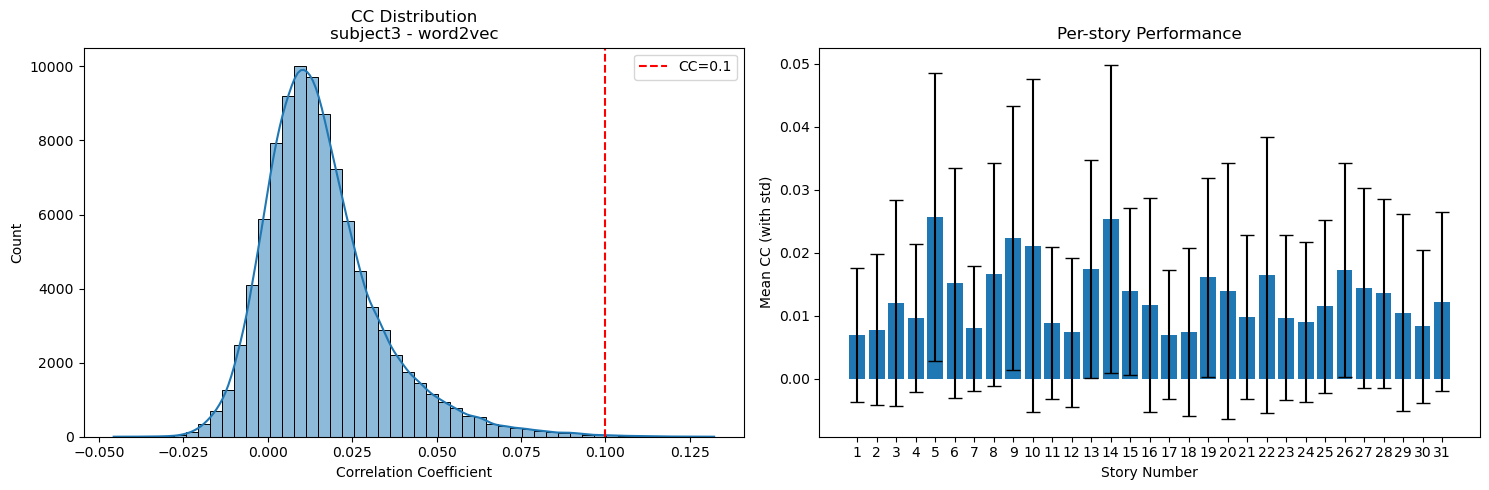


Results Summary:
Mean CC: 0.0162
Median CC: 0.0133
Top 1% CC: 0.0747
Top 5% CC: 0.0498
Voxels with CC > 0.1: 0.1%

Evaluating glove embedding for subject3

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1200 features → 95556 voxels
Testing:  10283 timepoints × 1200 features → 95556 voxels

Running cross-validation...
CV mean CC: 0.0172 (±0.0010)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0069 ± 0.0102
Story 2: mean CC = 0.0072 ± 0.0107
Story 3: mean CC = 0.0109 ± 0.0142
Story 4: mean CC = 0.0089 ± 0.0104
Story 5: mean CC = 0.0235 ± 0.0203
Story 6: mean CC = 0.0117 ± 0.0137
Story 7: mean CC = 0.0080 ± 0.0094
Story 8: mean CC = 0.0145 ± 0.0159
Story 9: mean CC = 0.0193 ± 0.0174
Story 10: mean CC = 0.0164 ± 0.0195
Story 11: mean CC = 0.0084 ± 0.0100
Story 12: mean CC = 0.0074 ± 0.0119
Story 13: mean CC = 0.0155 ± 0.0152
Story 14: mean CC = 0.0223 ± 0.0202
Story 15: mean CC = 0.0111 ± 0.0115
Story 16: mean CC = 0.0098 ± 0.0

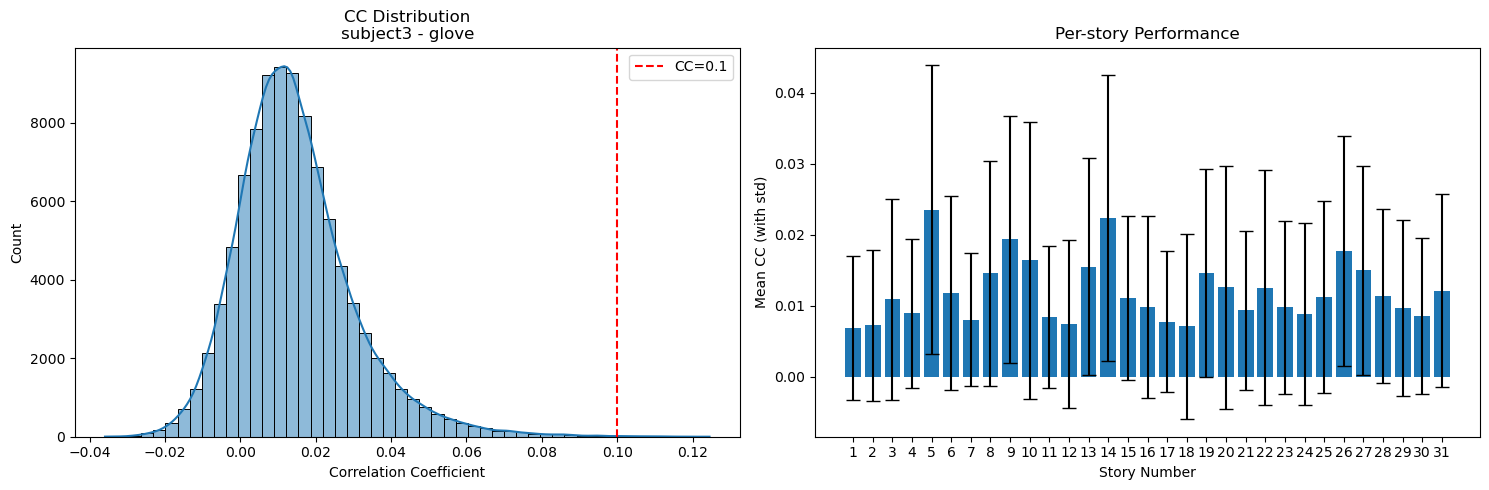


Results Summary:
Mean CC: 0.0147
Median CC: 0.0128
Top 1% CC: 0.0640
Top 5% CC: 0.0431
Voxels with CC > 0.1: 0.1%

Evaluating bag_of_words embedding for subject3

Number of stories - Train: 70, Test: 31
Data dimensions:
Training: 24503 timepoints × 1500 features → 95556 voxels
Testing:  10283 timepoints × 1500 features → 95556 voxels

Running cross-validation...
CV mean CC: 0.0131 (±0.0008)

Training final model...

Per-story performance:
Story 1: mean CC = 0.0025 ± 0.0098
Story 2: mean CC = 0.0044 ± 0.0111
Story 3: mean CC = 0.0075 ± 0.0146
Story 4: mean CC = 0.0056 ± 0.0125
Story 5: mean CC = 0.0204 ± 0.0202
Story 6: mean CC = 0.0132 ± 0.0191
Story 7: mean CC = 0.0030 ± 0.0111
Story 8: mean CC = 0.0121 ± 0.0173
Story 9: mean CC = 0.0155 ± 0.0177
Story 10: mean CC = 0.0170 ± 0.0294
Story 11: mean CC = 0.0043 ± 0.0131
Story 12: mean CC = 0.0044 ± 0.0120
Story 13: mean CC = 0.0137 ± 0.0158
Story 14: mean CC = 0.0224 ± 0.0201
Story 15: mean CC = 0.0083 ± 0.0144
Story 16: mean CC = 0.009

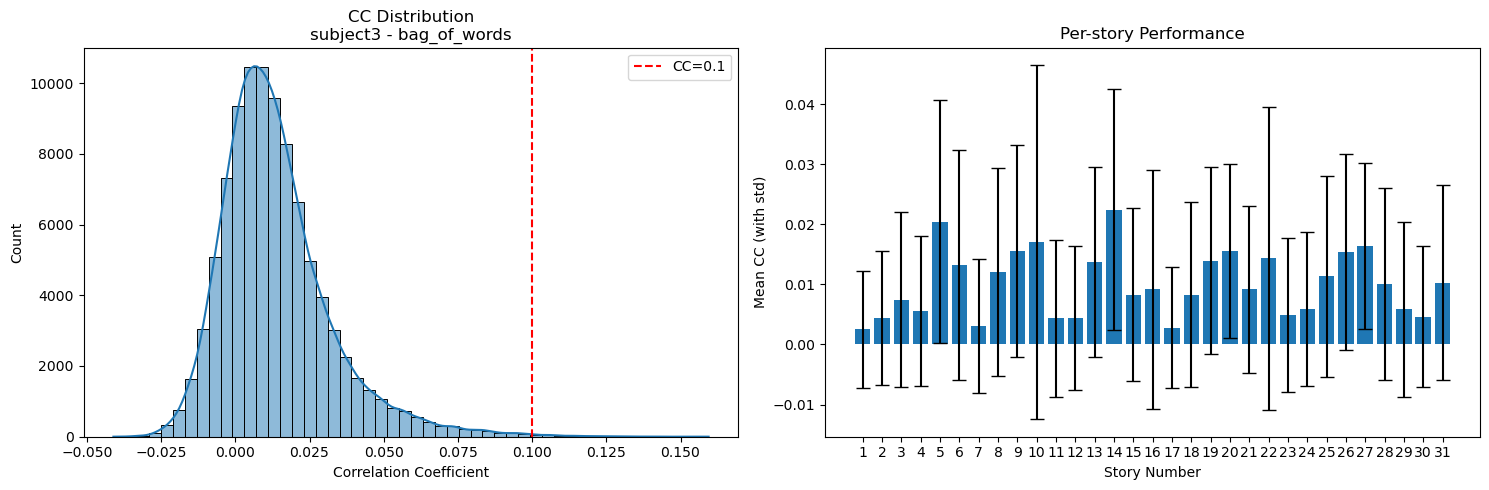


Results Summary:
Mean CC: 0.0138
Median CC: 0.0108
Top 1% CC: 0.0782
Top 5% CC: 0.0490
Voxels with CC > 0.1: 0.2%

=== Final Cross-subject Comparison ===

word2vec:
subject2:
  Mean CC: 0.0101
  Voxels > 0.1: 0.0%
subject3:
  Mean CC: 0.0162
  Voxels > 0.1: 0.1%

glove:
subject2:
  Mean CC: 0.0097
  Voxels > 0.1: 0.0%
subject3:
  Mean CC: 0.0147
  Voxels > 0.1: 0.1%

bag_of_words:
subject2:
  Mean CC: 0.0091
  Voxels > 0.1: 0.0%
subject3:
  Mean CC: 0.0138
  Voxels > 0.1: 0.2%


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ridge_utils.ridge import bootstrap_ridge, ridge_corr, ridge_corr_pred, zs
import pickle
import os

# Create results directory
os.makedirs('../results', exist_ok=True)

# Create figs directory
os.makedirs('../figs', exist_ok=True)

# Constants
ALPHAS = np.logspace(1, 3, 3)  # [10, 100, 1000]
NBOOTS = 3
CHUNKLEN = 10
CC_THRESHOLD = 0.1  # Updated threshold from 0.2 to 0.1

def evaluate_embedding(train_embed, test_embed, train_resp, test_resp, embed_name, subject_name):
    """Efficient evaluation with focused output."""
    print(f"\n{'='*50}")
    print(f"Evaluating {embed_name} embedding for {subject_name}")
    
    # Data preparation
    train_keys = sorted(set(train_embed.keys()) & set(train_resp.index))
    test_keys = sorted(set(test_embed.keys()) & set(test_resp.index))
    
    print(f"\nNumber of stories - Train: {len(train_keys)}, Test: {len(test_keys)}")
    
    X_train_list, y_train_list = [], []
    X_test_dict, y_test_dict = {}, {}
    
    # Prepare training data
    for key in train_keys:
        embed = train_embed[key]
        resp = train_resp.loc[key, 'measurement_data']
        min_len = min(embed.shape[0], resp.shape[0])
        X_train_list.append(embed[:min_len])
        y_train_list.append(resp[:min_len])
    
    # Prepare test data
    for key in test_keys:
        embed = test_embed[key]
        resp = test_resp.loc[key, 'measurement_data']
        min_len = min(embed.shape[0], resp.shape[0])
        X_test_dict[key] = embed[:min_len]
        y_test_dict[key] = resp[:min_len]
    
    X_train = np.vstack(X_train_list)
    y_train = np.vstack(y_train_list)
    X_test = np.vstack(list(X_test_dict.values()))
    y_test = np.vstack(list(y_test_dict.values()))
    
    print(f"Data dimensions:")
    print(f"Training: {X_train.shape[0]} timepoints × {X_train.shape[1]} features → {y_train.shape[1]} voxels")
    print(f"Testing:  {X_test.shape[0]} timepoints × {X_test.shape[1]} features → {y_test.shape[1]} voxels")
    
    # Cross-validation
    n_splits = 3
    chunk_size = len(X_train) // n_splits
    cv_scores = []
    
    print("\nRunning cross-validation...")
    for i in range(n_splits):
        val_start = i * chunk_size
        val_end = (i + 1) * chunk_size
        
        X_val = X_train[val_start:val_end]
        y_val = y_train[val_start:val_end]
        X_train_cv = np.vstack([X_train[:val_start], X_train[val_end:]])
        y_train_cv = np.vstack([y_train[:val_start], y_train[val_end:]])
        
        wt_cv, corrs_cv, _, _, _ = bootstrap_ridge(
            X_train_cv, y_train_cv, X_val, y_val,
            alphas=ALPHAS, nboots=NBOOTS, chunklen=CHUNKLEN,
            nchunks=3, corrmin=CC_THRESHOLD, normalpha=True
        )
        cv_scores.append(np.mean(corrs_cv))
    
    print(f"CV mean CC: {np.mean(cv_scores):.4f} (±{np.std(cv_scores):.4f})")
    
    # Final model training
    print("\nTraining final model...")
    wt, corrs, valphas, allRcorrs, _ = bootstrap_ridge(
        X_train, y_train, X_test, y_test,
        alphas=ALPHAS, nboots=NBOOTS, chunklen=CHUNKLEN,
        nchunks=3, corrmin=CC_THRESHOLD, normalpha=True
    )
    
    # Per-story analysis
    story_performances = {}
    story_boundaries = np.cumsum([0] + [len(X_test_dict[k]) for k in test_keys])
    
    print("\nPer-story performance:")
    for i, key in enumerate(test_keys):
        story_corrs = corrs[story_boundaries[i]:story_boundaries[i+1]]
        story_performances[key] = {
            'mean_cc': np.nanmean(story_corrs),
            'median_cc': np.nanmedian(story_corrs),
            'std_cc': np.nanstd(story_corrs),
            'n_voxels': len(story_corrs),
            'correlations': story_corrs
        }
        print(f"Story {i+1}: mean CC = {story_performances[key]['mean_cc']:.4f} ± {story_performances[key]['std_cc']:.4f}")
    
    # Compute metrics
    metrics = {
        'mean_cc': np.nanmean(corrs),
        'median_cc': np.nanmedian(corrs),
        'top_1_percentile': np.nanpercentile(corrs, 99),
        'top_5_percentile': np.nanpercentile(corrs, 95),
        'correlations': corrs,
        'cv_scores': cv_scores,
        'story_performances': story_performances,
        'voxels_above_threshold': np.mean(corrs > CC_THRESHOLD) * 100
    }
    
    # Save model
    model_data = {
        'weights': wt,
        'best_alphas': valphas,
        'metrics': metrics,
        'training_shapes': {'X': X_train.shape, 'y': y_train.shape}
    }
    
    with open(f'../results/ridge_model_{subject_name}_{embed_name}.pkl', 'wb') as f:
        pickle.dump(model_data, f)
    
    # Plotting
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # CC Distribution
    sns.histplot(corrs[~np.isnan(corrs)], bins=50, kde=True, ax=ax1)
    ax1.axvline(x=CC_THRESHOLD, color='r', linestyle='--', label=f'CC={CC_THRESHOLD}')
    ax1.set_title(f'CC Distribution\n{subject_name} - {embed_name}')
    ax1.set_xlabel('Correlation Coefficient')
    ax1.legend()
    
    # Story Performance with numerical indices
    story_means = [perf['mean_cc'] for perf in story_performances.values()]
    story_stds = [perf['std_cc'] for perf in story_performances.values()]
    x_pos = np.arange(1, len(story_means) + 1)
    
    ax2.bar(x_pos, story_means, yerr=story_stds, capsize=5)
    ax2.set_title('Per-story Performance')
    ax2.set_xlabel('Story Number')
    ax2.set_ylabel('Mean CC (with std)')
    ax2.set_xticks(x_pos)
    
    plt.tight_layout()
    
    # Save figure as PNG in ../figs directory
    fig.savefig(os.path.join('../figs', f"{subject_name}_{embed_name}.png"), dpi=300)
    
    # Display figure
    plt.show()
    
    # Print final results
    print("\nResults Summary:")
    print(f"Mean CC: {metrics['mean_cc']:.4f}")
    print(f"Median CC: {metrics['median_cc']:.4f}")
    print(f"Top 1% CC: {metrics['top_1_percentile']:.4f}")
    print(f"Top 5% CC: {metrics['top_5_percentile']:.4f}")
    print(f"Voxels with CC > {CC_THRESHOLD}: {metrics['voxels_above_threshold']:.1f}%")
    
    return metrics

# Main execution
subjects_to_analyze = {
    'subject2': (train_resp_subject2, test_resp_subject2),
    'subject3': (train_resp_subject3, test_resp_subject3)
}

embedding_pairs = {
    'word2vec': (word2vec_train, word2vec_test),
    'glove': (glove_train, glove_test),
    'bag_of_words': (dict_embed_train, dict_embed_test)
}

# Run analysis
all_results = {}
for subject_name, (train_resp, test_resp) in subjects_to_analyze.items():
    print(f"\n{'='*20} Analyzing {subject_name} {'='*20}")
    
    subject_results = {}
    for embed_name, (train_embed, test_embed) in embedding_pairs.items():
        subject_results[embed_name] = evaluate_embedding(
            train_embed, test_embed,
            train_resp, test_resp,
            embed_name, subject_name
        )
    
    all_results[subject_name] = subject_results

# Final cross-subject comparison
print("\n=== Final Cross-subject Comparison ===")
for embed_name in embedding_pairs:
    print(f"\n{embed_name}:")
    for subject_name in subjects_to_analyze:
        metrics = all_results[subject_name][embed_name]
        print(f"{subject_name}:")
        print(f"  Mean CC: {metrics['mean_cc']:.4f}")
        print(f"  Voxels > {CC_THRESHOLD}: {metrics['voxels_above_threshold']:.1f}%")


In [51]:
abc = 1

In [52]:
dasdas

NameError: name 'dasdas' is not defined